In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r'c:\Users\DELL\Downloads\placements(Sheet1) (1).csv')

In [3]:
df

,CGPA,Package (LPA)
0,5.00,3
1,4.30,2
2,6.90,7
3,8.00,10
4,4.00,3
5,9.89,12
6,7.00,5
7,6.66,8
8,7.90,8
9,5.50,6


In [4]:
df.shape

(30, 2)

In [9]:
X = df['CGPA']
X

0     5.00
1     4.30
2     6.90
3     8.00
4     4.00
5     9.89
6     7.00
7     6.66
8     7.90
9     5.50
10    7.20
11    2.00
12    9.00
13    6.90
14    8.05
15    5.89
16    9.83
17    3.05
18    4.09
19    8.00
20    7.65
21    5.00
22    4.32
23    7.00
24    9.80
25    8.90
26    5.40
27    8.00
28    3.20
29    6.70
Name: CGPA, dtype: float64

In [10]:
y = df['Package (LPA)']
y

0      3
1      2
2      7
3     10
4      3
5     12
6      5
7      8
8      8
9      6
10     6
11     2
12    10
13     8
14    11
15     6
16    10
17     4
18     6
19     7
20     9
21     3
22     5
23     8
24    12
25    10
26     4
27     9
28     4
29     8
Name: Package (LPA), dtype: int64

<Axes: xlabel='CGPA', ylabel='Package (LPA)'>

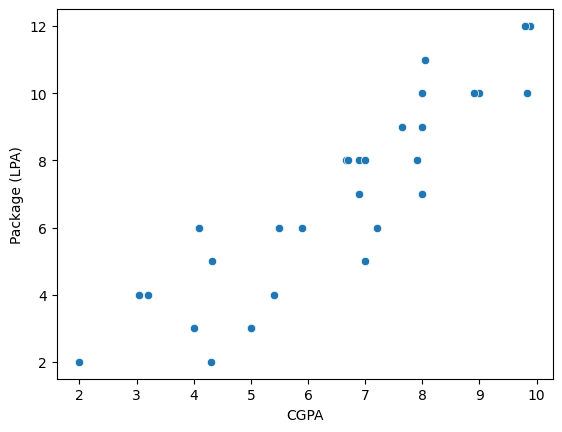

In [11]:
sns.scatterplot(data = df,x = X,y = y)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [15]:
class Linreg:
  def __init__(self):
    self.m = None
    self.b = None
  def fit(self, X_train, y_train):
        x_mean = X_train.mean()
        y_mean = y_train.mean()
        num = 0
        den = 0
        for i in range(len(X_train)):
          xi = X_train[i]
          yi = y_train[i]

          num += (xi - x_mean) * (yi - y_mean)
          den += (xi - x_mean) ** 2

        self.m = num / den
        self.b = y_mean - (self.m * x_mean)

        print(f"Slope (m): {self.m}")
        print(f"Intercept (b): {self.b}")

  def predict(self, X_test):
    return self.m * X_test + self.b

In [16]:
lr = Linreg()
lr.fit(X_train,y_train)

Slope (m): 1.2888300329697115
Intercept (b): -1.5985204542621165


In [17]:
X_test

27    8.00
15    5.89
23    7.00
17    3.05
8     7.90
9     5.50
Name: CGPA, dtype: float64

In [18]:
print(lr.predict(X_test.iloc[0]))

8.712119809495576


it's so close. original value in target column is 9

In [19]:
y_pred = lr.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mse

0.6327658803911885

In [21]:
r2_score(y_test,y_pred)

0.7744596861972001

Our Linear regression, which we implemented from scratch is working pretty well.